In [1]:
import sklearn
import sklearn.datasets as datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
faces_data = datasets.fetch_olivetti_faces()
person_ids, image_array = faces_data['target'], faces_data.images
X = image_array.reshape((len(person_ids), 64*64))

In [3]:
print("** 원본 데이터 군집화 결과")
model = KMeans(n_clusters=40)
model.fit(X)

** 원본 데이터 군집화 결과


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=40, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
print("군집화 성능: ", silhouette_score(X, model.labels_))
print("얼굴 일치율: ", metrics.adjusted_rand_score(model.labels_, person_ids))
print("** 주성분 분석 후 군집화 결과")
pca = PCA(25)
pca.fit(X)
X_reduced = pca.transform(X)
model_reduced = KMeans(n_clusters=40)
model_reduced.fit(X_reduced)

군집화 성능:  0.144707
얼굴 일치율:  0.4809963636503785
** 주성분 분석 후 군집화 결과


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=40, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
labels_reduced = model_reduced.labels_
print("군집화 성능: ", silhouette_score(X_reduced, model_reduced.labels_))
print("얼굴 일치율: ", metrics.adjusted_rand_score(model_reduced.labels_, person_ids))

군집화 성능:  0.22864205
얼굴 일치율:  0.4684626436781609


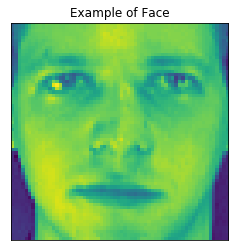

In [6]:
sample_face = image_array[0,:,:]
plt.imshow(sample_face)
plt.title("Example of Face")
plt.xticks([])
plt.yticks([])
plt.show()

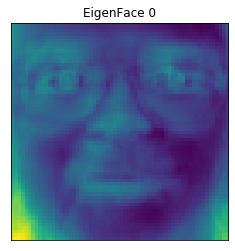

In [7]:
eigenface0 = pca.components_[0,:].reshape((64, 64))
plt.imshow(eigenface0)
plt.title("EigenFace 0")
plt.xticks([])
plt.yticks([])
plt.show()

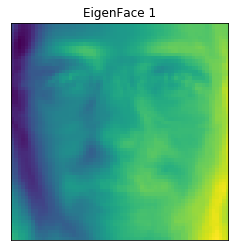

In [8]:
eigenface1 = pca.components_[1,:].reshape((64,64))
plt.imshow(eigenface1)
plt.title("EigenFace 1")
plt.xticks([])
plt.yticks([])
plt.show()

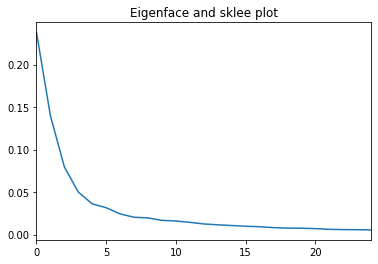

In [9]:
pd.Series(pca.explained_variance_ratio_).plot()
plt.title("Eigenface and sklee plot")
plt.show()